# Introduction

For this project, you will act as a data researcher for the World Health Organization. You will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

During this project, you will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

After you perform analysis, you'll be creating an article with your visualizations to be featured in the fictional "Time Magazine".

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2 Prep The Data

To look for connections between GDP and life expectancy you will need to load the datasets into DataFrames so that they can be visualized.

Load **all_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.

Hint: Use `pd.read_csv()`


In [2]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Step 3 Examine The Data

The datasets are large and it may be easier to view the entire dataset locally on your computer. You can open the CSV files directly from the folder you downloaded for this project.

Let's learn more about our data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

What six countries are represented in the data?

In [8]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


What years are represented in the data?

In [9]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Step 4 Tweak The DataFrame

Look at the column names of the DataFrame `df` using `.head()`. 

In [10]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


What do you notice? The first two column names are one word each, and the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. 

**Revise The DataFrame Part A:** 

Use Pandas to change the name of the last column to `LEABY`.

Hint: Use `.rename()`. [You can read the documentation here.](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)). </font>

In [13]:
df = df.rename(columns={"Life expectancy at birth (years)": "LEABY"})

Run `df.head()` again to check your new column name worked.

<Figure size 576x432 with 0 Axes>

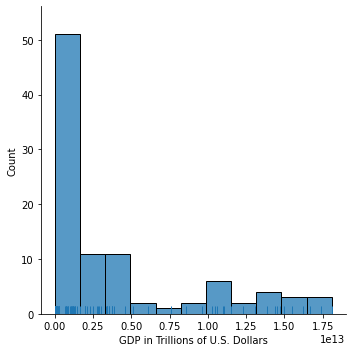

<Figure size 576x432 with 0 Axes>

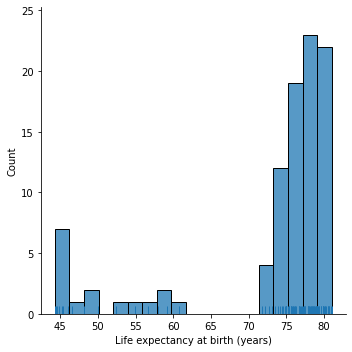

In [108]:
df.head()
plt.figure(figsize=(8,6))
sns.displot(df.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars");
plt.figure(figsize=(8,6))
sns.displot(df.LEABY, rug = True, kde=False)
plt.xlabel("Life expectancy at birth (years)");

---

## Step 5 Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in `df` using `Country` on the x-axis and `GDP` on the y-axis. 
Remember to `plt.show()` your chart!

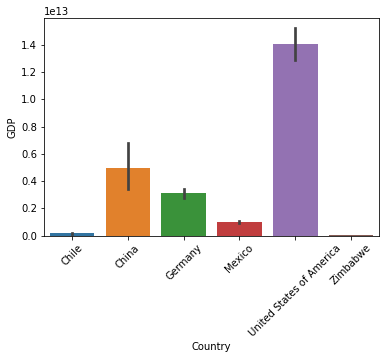

<Figure size 432x288 with 0 Axes>

In [95]:
sns.barplot(x="Country",y="GDP",data=df)
plt.xticks(rotation=45)  # Specify the rotation angle in degrees
plt.show()
plt.clf()

B) Create a bar chart using the data in `df` with `Country` on the x-axis and `LEABY` on the y-axis.
Remember to `plt.show()` your chart!

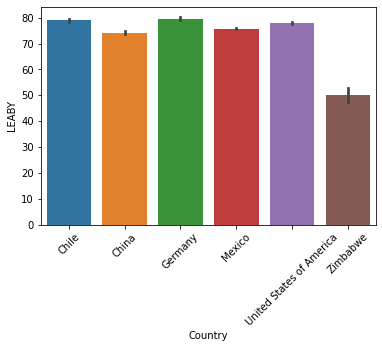

<Figure size 432x288 with 0 Axes>

In [23]:
sns.barplot(x="Country",y="LEABY",data=df)
plt.xticks(rotation=45)  # Specify the rotation angle in degrees
plt.show()
plt.clf()

What do you notice about the two bar charts? Do they look similar?

- We can see that in the first barpole for the average GDP by country, the USA seems to have a much higher value compared to the rest of the countries, and Zimbabwe is not even visible, and Chile is almost invisible. In comparison, the US has a huge GDP compared to others. China, Germany and Mexico seem to be relatively close in terms of numbers.
- In the second column, we can see not too big differences between countries, with the exception of Zimbabwe, which has the lowest life expectancy at birth (years), for the others it is almost the same.
- To compare these two histograms, it is difficult to tell if there is a positive correlation yet, we need more data

## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

We have added the code to instantiate a figure with the correct dimmensions to observe detail. 
1. Create an `sns.violinplot()` for the dataframe `df` and map `Country` and `LEABY` as its respective `x` and `y` axes. 
2. Be sure to show your plot

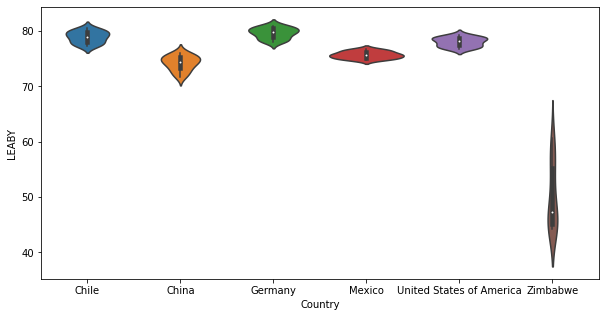

<Figure size 432x288 with 0 Axes>

In [92]:
fig = plt.subplots(figsize=(10, 5)) 
sns.violinplot(x='Country',y='LEABY', data=df)
plt.show()
plt.clf()

What do you notice about this distribution? Which country's life expactancy has changed the most?

- Yes with Zimbabwe having the greatest increase in Life expectancy over time

## Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

First, can plot the progession of GDP's over the years by country in a barplot using Seaborn.
We have set up a figure with the correct dimensions for your plot. Under that declaration:
1. Save `sns.barplot()` to a variable named `ax`
2. Chart `Country` on the x axis, and `GDP` on the `Y` axis on the barplot. Hint: `ax = sns.barplot(x="Country", y="GDP")`
3. Use the `Year` as a `hue` to differentiate the 15 years in our data. Hint: `ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df)`
4. Since the names of the countries are long, let's rotate their label by 90 degrees so that they are legible. Use `plt.xticks("rotation=90")`
5. Since our GDP is in trillions of US dollars, make sure your Y label reflects that by changing it to `"GDP in Trillions of U.S. Dollars"`. Hint: `plt.ylabel("GDP in Trillions of U.S. Dollars")`
6. Be sure to show your plot.


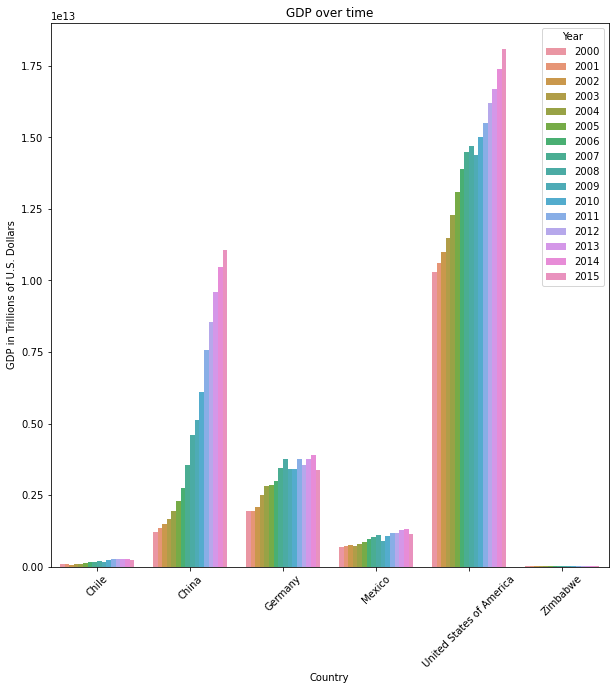

<Figure size 432x288 with 0 Axes>

In [41]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x='Country',y='GDP',hue='Year',data=df)
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.xticks(rotation=45)
plt.title("GDP over time")
plt.show()
plt.clf()

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

The code will essentially be the same as above! The beauty of Seaborn relies in its flexibility and extensibility. Paste the code from above in the cell bellow, and: 
1. Change your `y` value to `LEABY` in order to plot life expectancy instead of GDP. Hint: `ax = sns.barplot(x="Country", y="LEABY", hue="Year", data=df)`
2. Tweak the name of your `ylabel` to reflect this change, by making the label `"Life expectancy at birth in years"` Hint: `ax.set(ylabel="Life expectancy at birth in years")`


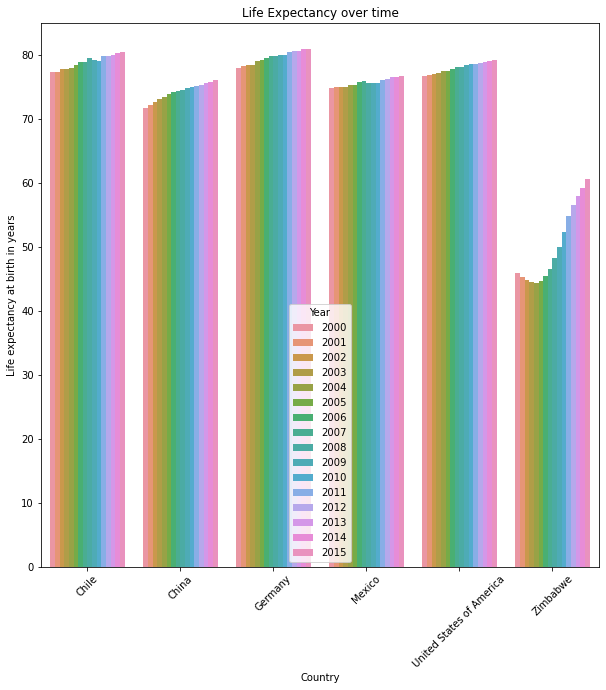

<Figure size 432x288 with 0 Axes>

In [40]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x='Country',y='LEABY',hue='Year',data=df)
plt.ylabel("Life expectancy at birth in years")
plt.xticks(rotation=45)
plt.title("Life Expectancy over time")
plt.show()
plt.clf()

What are your first impressions looking at the visualized data?

- Which countries' bars changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in GDP over time? 
- How do countries compare to one another?
- Now that you can see the both bar charts, what do you think about the relationship between GDP and life expectancy?
- Can you think of any reasons that the data looks like this for particular countries?

Note: You've mapped two bar plots showcasing a variable over time by country, however, bar charts are not traditionally used for this purpose. In fact, a great way to visualize a variable over time is by using a line plot. While the bar charts tell us some information, the data would be better illustrated on a line plot.  We will complete this in steps 9 and 10, for now let's switch gears and create another type of chart.

- For the GDP the most changes is in China and for Life Expectancy over time is Zibabwe
- The bigest changes in the data are in years 2009 to 2011
- The least changes in GDP over time is Zimbabwe
- For the average GDP by Country it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.
- We can't see clear of the relationship between GDP and Life Expectancy from both bar charsts, we need more data
- This Forbes article describes China's unmatched GDP growth in the past decades were due to it's large population, newly available capital and manufacturing efficiency. The study can ascertain that the findings in the data matches the real world findings for GDP growth in China.


## Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

To create multiple plots for comparison, Seaborn has a special (function)[https://seaborn.pydata.org/generated/seaborn.FacetGrid.html] called `FacetGrid`. A FacetGrid takes in a function and creates an individual graph for which you specify the arguments!
    
Since this may be the first time you've learned about FacetGrid, we have prepped a fill in the blank code snippet below. 
Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up for every Year in the data
3. We want the data points to be differentiated (hue) by Country.
4. We want to use a Matplotlib scatter plot to visualize the different graphs


Be sure to show your plot!


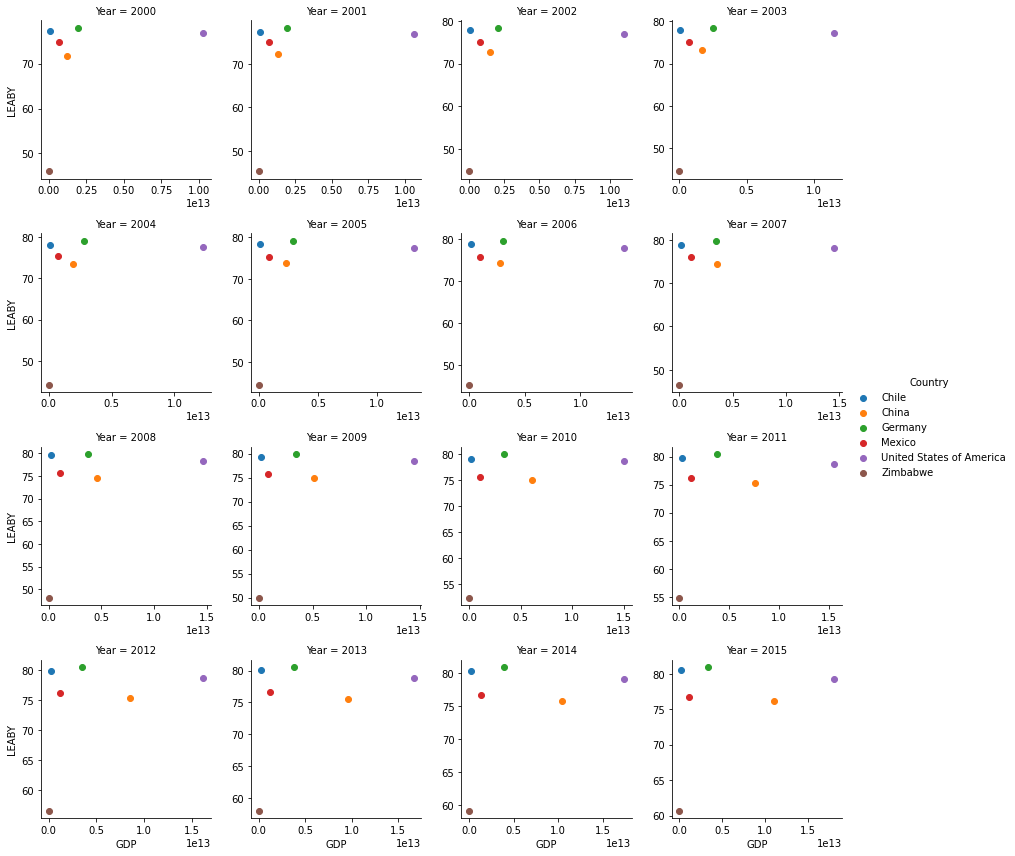

In [115]:
# WORDBANK:
# "Year"
# "Country" 
# "GDP" 
# "LEABY" 
# plt.scatter


# Uncomment the code below and fill in the blanks
g = sns.FacetGrid(df, col='Year', hue='Country', col_wrap=4, sharey = False, sharex = False)
g = (g.map(plt.scatter, 'GDP', 'LEABY').add_legend())
plt.savefig("scatterplot_map_GDP_and_LEABY.png")

+ Which country moves the most along the X axis over the years?
+ Which country moves the most along the Y axis over the years?
+ Is this surprising?
+ Do you think these scatter plots are easy to read? Maybe there's a way to plot that! 

- U.S.A and China is the countries which moves the most along the X axis over the years
- Zimbabwe is the country which moves the most along the Y axis over the years
- It is not surprising that China and the United States have experienced significant economic growth over the past years, as both countries are major global economic powers.
- It is not easy to read these scatter plots. Prehaps there are another way to plot this data for more easy to read

## Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. 
It would be better illustrated with a line graph for each GDP and Life Expectancy by country. 

FacetGrid also allows you to do that! Instead of passing in `plt.scatter` as your Matplotlib function, you would have to pass in `plt.plot` to see a line graph. A few other things have to change as well. So we have created a different codesnippets with fill in the blanks.  that makes use of a line chart, and we will make two seperate FacetGrids for both GDP and Life Expectancy separately.

Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want Years on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up by Country
3. We want to use a Matplotlib line plot to visualize the different graphs


Be sure to show your plot!



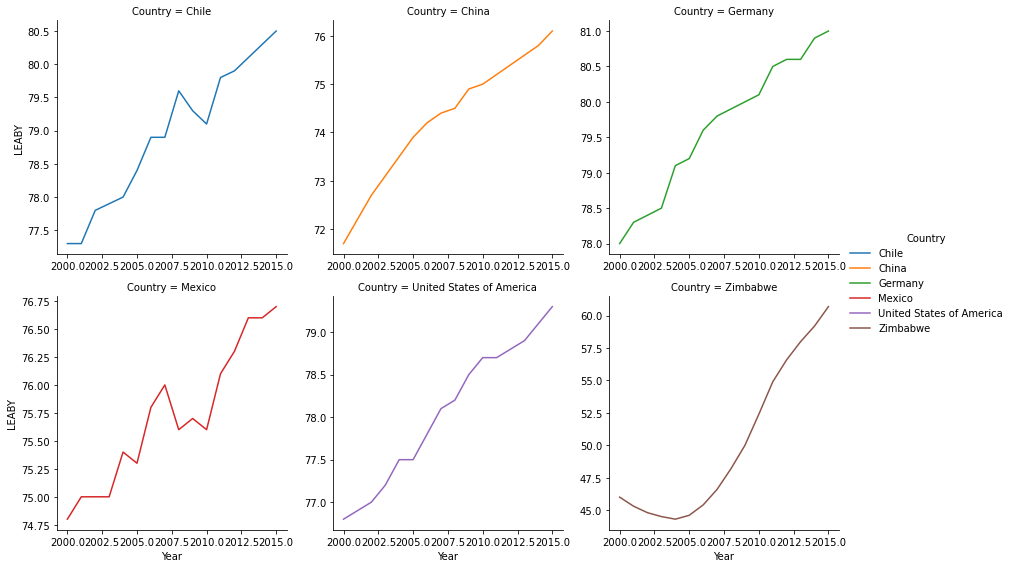

In [114]:
# WORDBANK:
# plt.plot
# "LEABY"
# "Year"
# "Country"


# Uncomment the code below and fill in the blanks
g3 = sns.FacetGrid(df, col="Country", hue="Country", col_wrap=3, height=4, sharey = False, sharex = False)
g3 = (g3.map(plt.plot, "Year", "LEABY").add_legend())
plt.savefig("plot_map.png")

What are your first impressions looking at the visualized data?

- Which countries' line changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in life expectancy over time? 
- Can you think of any reasons that the data looks like this for particular countries?

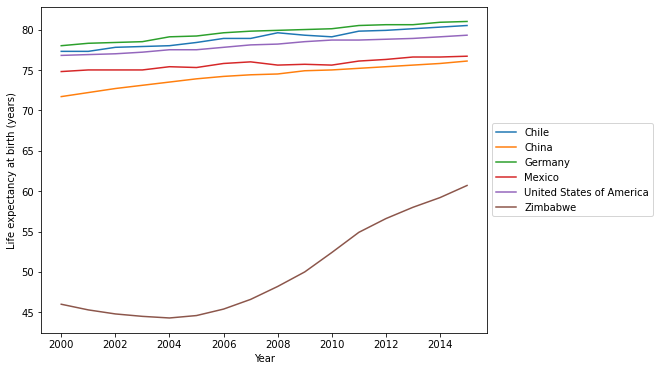

In [113]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");
plt.savefig("lineplot.png")

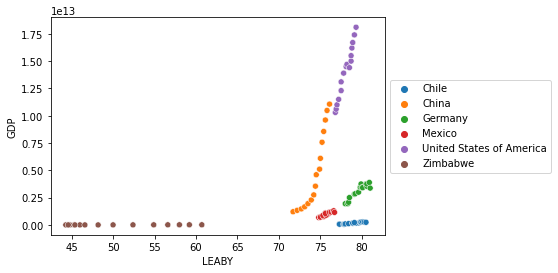

In [112]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);
plt.savefig("scatterplot.png")

## Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. Instead of Life Expectancy on the Y axis, we now we want GDP.

Once you complete and successfully run the code above, copy and paste it into the cell below. Change the variable for the X axis. Change the color on your own! Be sure to show your plot.


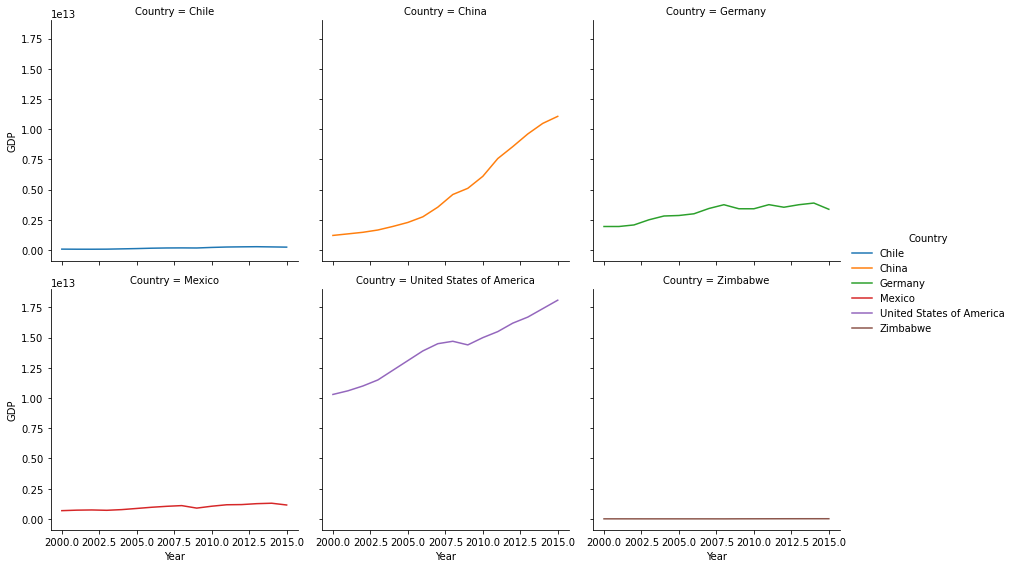

In [111]:
g3 = sns.FacetGrid(df, col="Country", hue='Country', col_wrap=3, height=4)
g3 = (g3.map(plt.plot, "Year", "GDP").add_legend())
plt.savefig("lineplot_map.png")

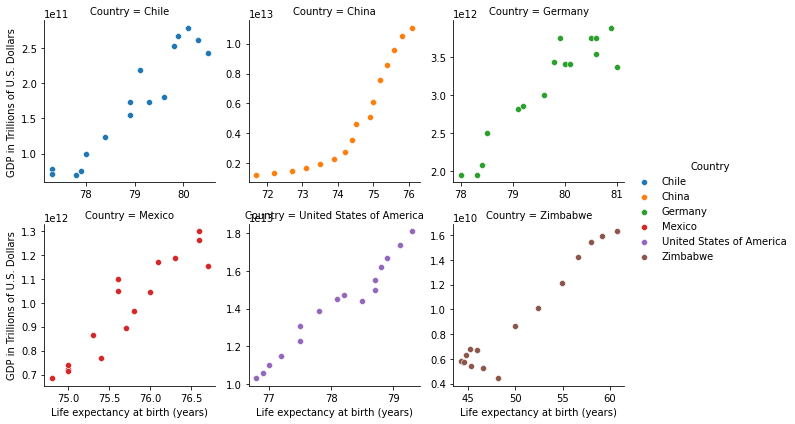

In [110]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));
plt.savefig("scatterplot_map.png")

Which countries have the highest and lowest GDP?

- Chile and Zimbabwe have the lowes GDP
- China and USA have the highest GDP

Which countries have the highest and lowest life expectancy?

- Germany have the highest life expectancy
- Zimbabwe have the lowest life expectancy

## Step 11 Researching Data Context 

Based on the visualization, choose one part the data to research a little further so you can add some real world context to the visualization. You can choose anything you like, or use the example question below.

What happened in China between in the past 10 years that increased the GDP so drastically?

- In the past 10 years, China's GDP saw significant growth due to factors like domestic consumption, urbanization, infrastructure development, technological advancements, and government initiatives promoting innovation, attracting foreign investment, and fostering entrepreneurship.

## Step 12 Create Blog Post

Use the content you have created in this Jupyter notebook to create a blog post reflecting on this data.
Include the following visuals in your blogpost:

1. The violin plot of the life expectancy distribution by country
2. The facet grid of scatter graphs mapping GDP as a function Life Expectancy by country
3. The facet grid of line graphs mapping GDP by country
4. The facet grid of line graphs mapping Life Expectancy by country


We encourage you to spend some time customizing the color and style of your plots! Remember to use `plt.savefig("filename.png")` to save your figures as a `.png` file.

When authoring your blog post, here are a few guiding questions to guide your research and writing:
+ How do you think the histories and the cultural values of each country relate to its GDP and life expectancy?
+ What would have helped make the project data more reliable? What were the limitations of the dataset?
+ Which graphs better illustrate different relationships??

## Title: Exploring the Relationships Between GDP, Life Expectancy

### Introduction:
- Understanding the factors that contribute to a country's GDP and life expectancy is crucial for policymakers and researchers. In this blog post, we will delve into the relationships between GDP, life expectancy, and cultural factors in six nations. We will examine how the histories and cultural values of each country may relate to their GDP and life expectancy. Additionally, we will discuss the reliability of the project data and the limitations of the dataset. Lastly, we will explore which graphs best illustrate different relationships. Let's dive in!

### Histories and Cultural Values:
- A country's history and cultural values can significantly impact its GDP and life expectancy. Historical events, such as wars, colonization, and economic policies, can shape a nation's economic development. For example, countries that have experienced prolonged conflicts or colonization may face challenges in building a robust economy, affecting their GDP growth.

It is important to recognize that the relationships between histories, cultural values, GDP, and life expectancy are complex and multifaceted. Each country has its unique context, and various factors interact to shape its economic and health outcomes.

### Data Reliability and Limitations:
- While the project was able to generate insightful findings, it is crucial to consider the reliability of the data and the limitations of the dataset. To enhance data reliability, several measures could have been taken:

1. Larger Sample Size: With only 96 rows, the dataset may not fully capture the diversity and complexity of each country. A larger sample size would provide a more comprehensive picture and increase the statistical robustness of the findings.

2. Longer Timeframe: The project examined GDP and life expectancy over time; however, a more extended timeframe would allow for a more thorough analysis of trends and potential long-term effects.

3. Data Accuracy: Ensuring the accuracy and consistency of the data is essential. Verification and cross-referencing with reliable sources would help minimize errors and discrepancies.

Despite these limitations, the project still provides valuable insights and serves as a starting point for further exploration.

### Graphs Illustrating Relationships:
- To visualize the relationships between GDP, life expectancy, and cultural factors, different types of graphs can be used. Here are a few examples:

1. Line Graph: A line graph can effectively illustrate the trends in GDP and life expectancy over time for each country. By plotting the data points chronologically, we can observe the changes and identify any significant patterns.

2. Scatter Plot: A scatter plot can demonstrate the correlation between GDP and life expectancy. Each country's data point can be plotted on the graph, with GDP on the x-axis and life expectancy on the y-axis. The distribution of the points would provide insights into the strength and nature of the relationship.

3. Bar Graph: A bar graph can be used to compare the average life expectancy among the six nations. The countries can be represented by individual bars, with the height of each bar corresponding to the average life expectancy value. This graph allows for easy comparison and identification of differences among the countries.


### What Did We Learn Throughout the Process?
Throughout the process, we learned several important insights:

GDP and Life Expectancy Trends: We discovered that life expectancy has generally increased over time in all six nations, with Zimbabwe experiencing the most significant increase. Additionally, GDP has shown an upward trend for all countries, with China exhibiting substantial growth.

Positive Correlation between GDP and Life Expectancy: Our analysis revealed a positive correlation between a country's GDP and its life expectancy. This means that as a nation's GDP increases, the life expectancy tends to rise as well.

Average Life Expectancy: The average life expectancy in most of the countries ranged from the mid to high 70s, except for Zimbabwe, where it was notably lower at around 50.

Left Skew Distribution: The distribution of life expectancy data had a left skew, indicating that a larger number of observations were concentrated towards higher life expectancy values, suggesting that more people tend to live longer lives.

###  Are the Results What We Expected?
Overall, the results align with our expectations based on existing knowledge and prior research. The positive correlation between GDP and life expectancy is well-established, and it is encouraging to see that all countries in our study experienced economic growth and improvements in life expectancy.

However, the lower average life expectancy in Zimbabwe highlights the importance of considering unique historical and cultural factors that can impact outcomes within a specific country.

###  Key Findings and Takeaways:

GDP and Life Expectancy: Life expectancy has increased over time in all six nations, with Zimbabwe showing the greatest improvement. GDP has also risen in all countries, with China experiencing substantial growth.

Correlation between GDP and Life Expectancy: There is a positive correlation between a country's GDP and its life expectancy. As GDP increases, life expectancy tends to rise as well.

Average Life Expectancy: Most countries had an average life expectancy in the mid to high 70s, except for Zimbabwe, which was lower at around 50.

Cultural Factors: Histories and cultural values influence a country's GDP and life expectancy. Factors like work ethic, education, healthcare priorities, and health attitudes contribute to disparities among nations.

Data Reliability: While the project provided valuable insights, the small dataset and limitations call for more comprehensive data collection in future analyses.

Policy Implications: Understanding these relationships helps policymakers develop targeted interventions to improve economic and health outcomes. Investments in education, healthcare, and addressing cultural factors are crucial.

### Conclusion:
Exploring the relationships between GDP, life expectancy, and cultural factors highlights the positive correlation between economic development and health outcomes. By addressing cultural factors and investing wisely, policymakers can work towards sustainable growth and better well-being for their populations.